# Linear and Polynomial Regression

## A simple example of linear and polynomial regression using Python and Scikit-learn

by [joaoalexarruda](https://github.com/joaoalexarruda)

<hr>


The dataset used in this example is the fishcatch. More information about the dataset can be found [here](https://jse.amstat.org/datasets/fishcatch.txt).


### 0. **Exploratory Analysis**


In [1]:
# Packages needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The function below is downloading the dataset from [joaoalexarruda/data_ipp](https://github.com/joaoalexarruda/data_ipp), a remote repository at GitHub.

More information about the function in [download_dataset.py](download_dataset.py).


In [2]:
from download_dataset import download_dataset

fishcatch = download_dataset(data_file='fishcatch', extension='.tar.xz')

In [3]:
# Quick peek at the data
df = pd.read_csv(fishcatch)
df.head(3).style.background_gradient(cmap='viridis')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


In [4]:
# Checking for useful information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# Checking for missing values
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

As shown above, there are no missing values in the dataset and 'Species' is the only categorical variable.


Out of curiosity, let's check how many species there are in the dataset, and their distribution, to see if there are any species that are underrepresented or overrepresented.


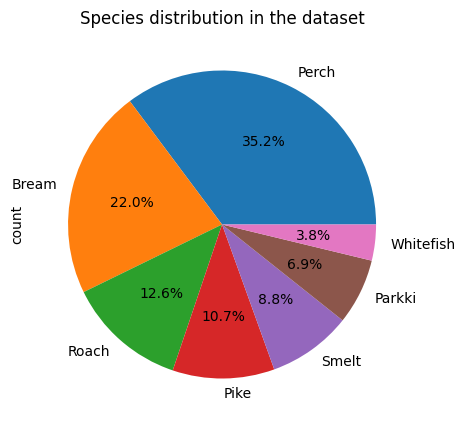

In [6]:
# Checking the distribution of the species
species = df['Species'].value_counts().plot(
    kind='pie', figsize=(10, 5), autopct='%1.1f%%')
plt.title('Species distribution in the dataset')
plt.show()

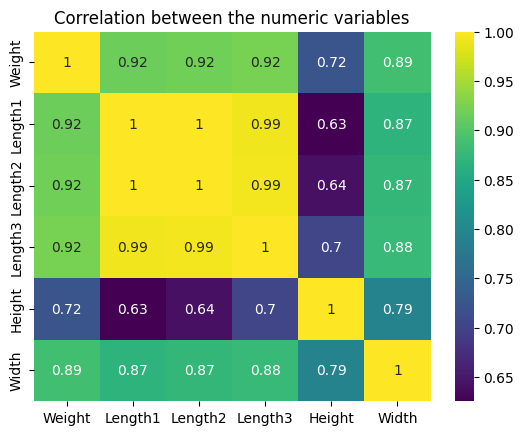

In [7]:
# Checking the correlation between the numeric variables
corr_matrix = df.drop(columns=['Species']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation between the numeric variables')
plt.show()

As seen above, the height doesn't seem to correlate well with the other variables, perhaps droping it from the analysis would be a good idea.


Since the target variable is 'Width', it's good to pay attention to its correlation with the other variables.


In [8]:
# Correlating just Width with the other variables
corr_matrix['Width'].sort_values(ascending=False)

Width      1.000000
Weight     0.886507
Length3    0.878520
Length2    0.873547
Length1    0.867050
Height     0.792881
Name: Width, dtype: float64

The correlation coefficient only measures linear relationships, so it's important to check for non-linear relationships as well.

A scatter plot can show us if the relationship between the variables is linear or not:


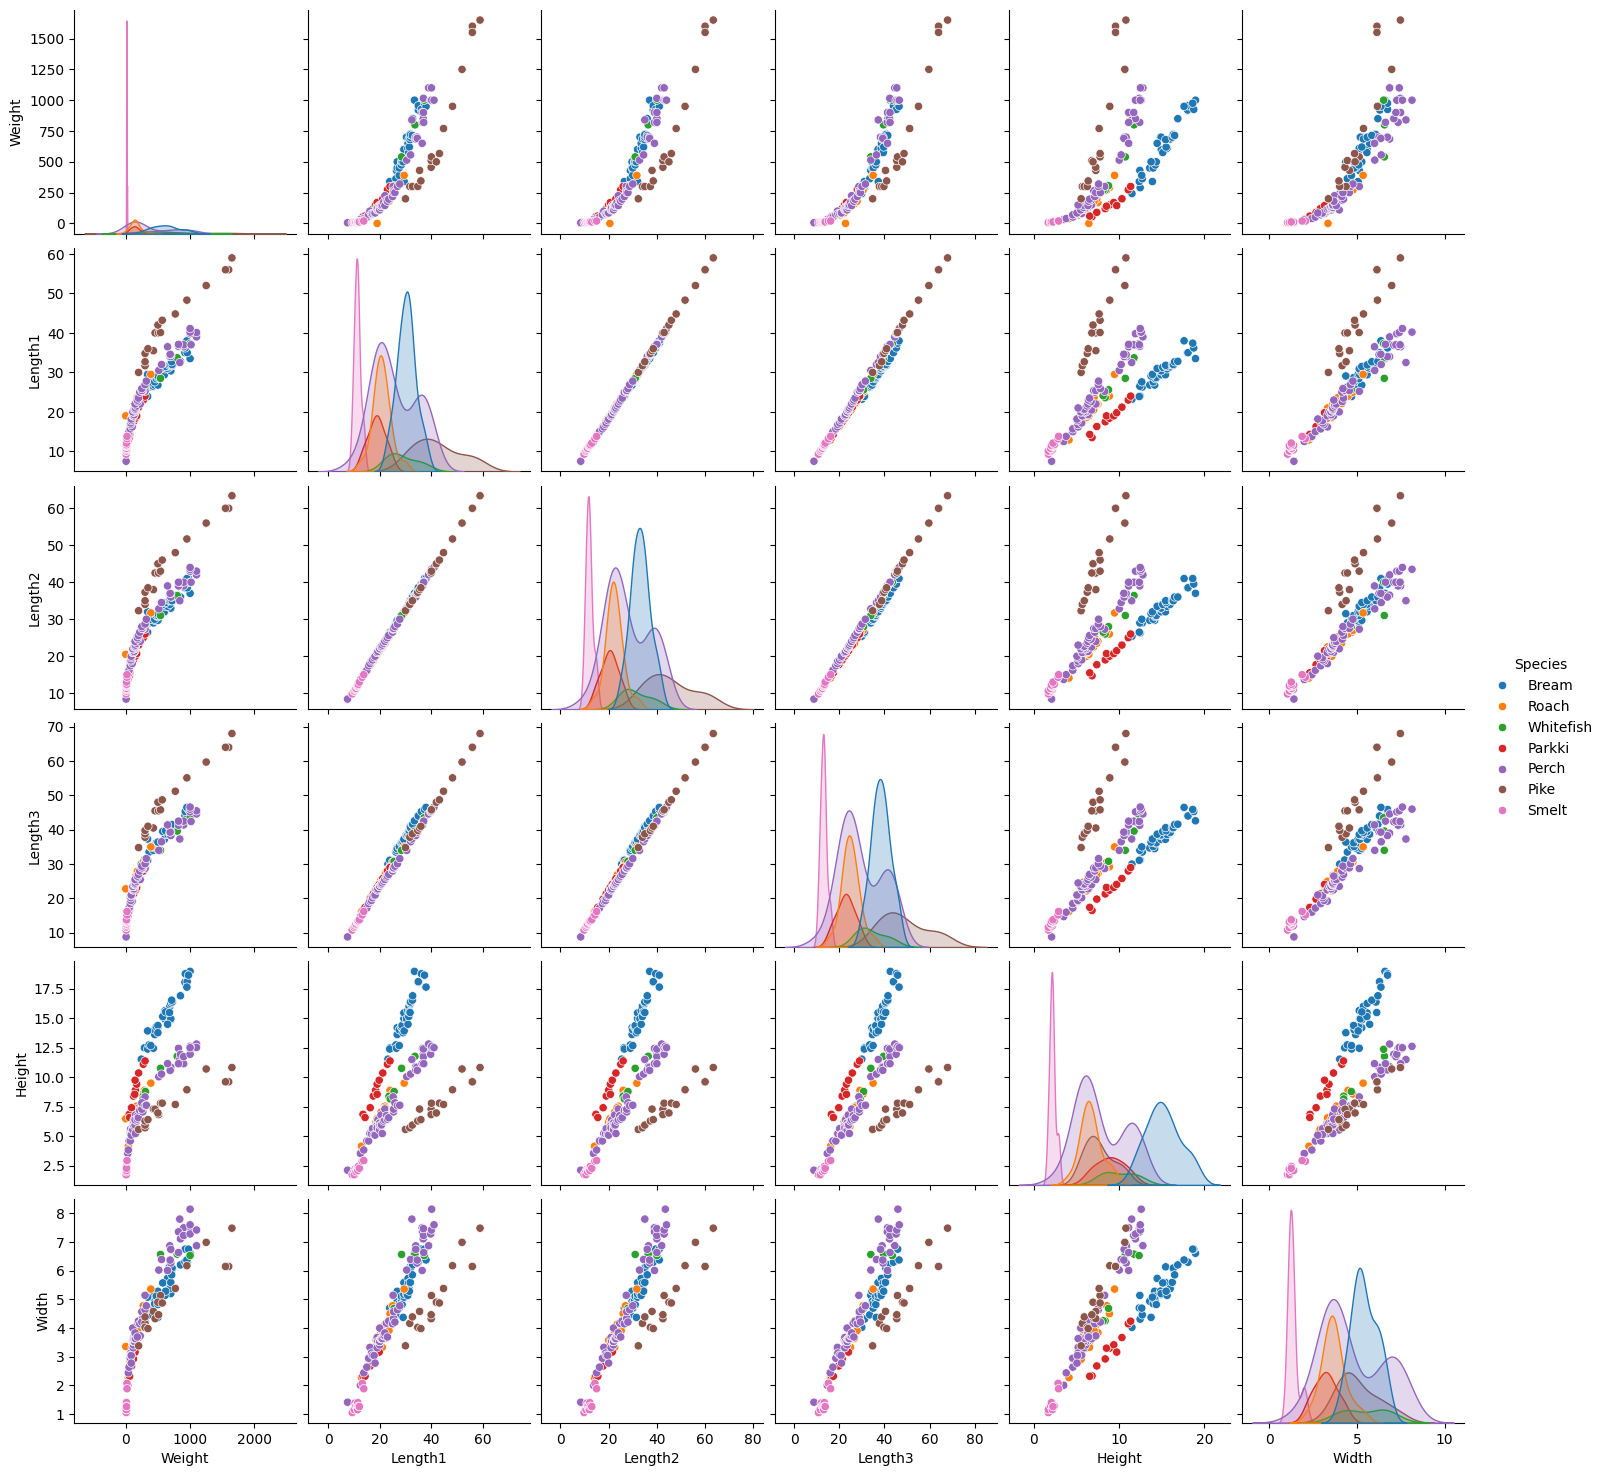

In [9]:
# Checking the correlation between variables
sns.pairplot(df, hue='Species')
plt.show()

On this pairplot it's possible to see that the species seems to define the distribution of the other variables. This is a good indication that the species is a good predictor for the other variables.

This pairplot also shows if the correlation between the variables is linear or not. For example, the correlation between the width and the length seems to be linear, while the correlation between the width and weight seems to be non-linear.


In [10]:
# Getting a summary of the dataset
df.describe().style.background_gradient(cmap='viridis')

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


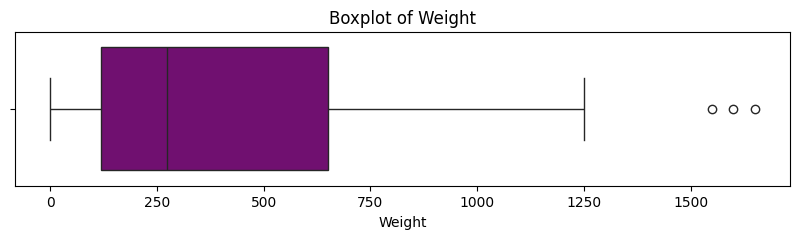

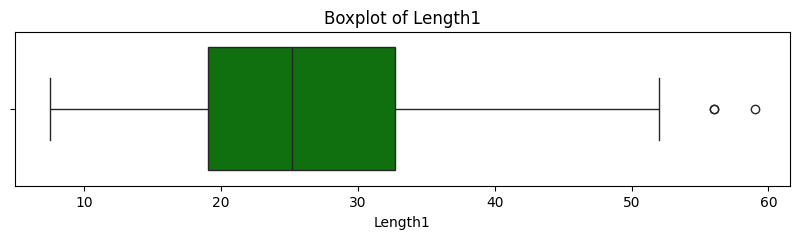

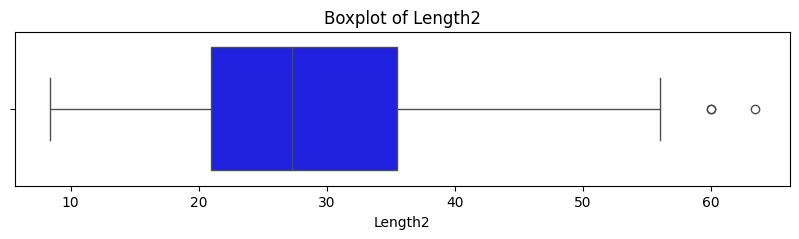

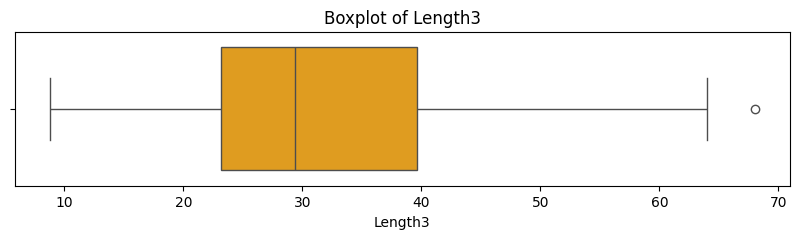

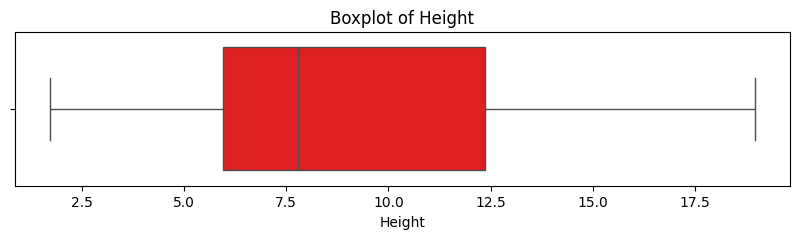

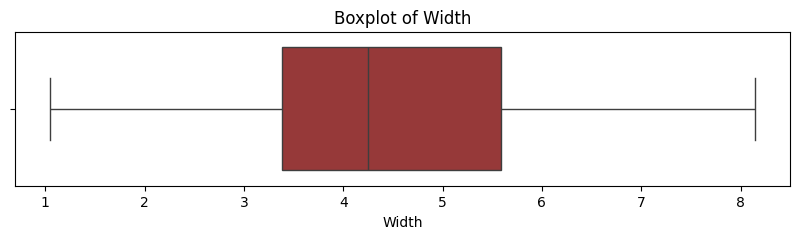

In [11]:
# Checking for outliers in the dataset
# Loop through each column in the dataset and plot a boxplot
colors = ['purple', 'green', 'blue', 'orange', 'red', 'brown']
i = 0
for column in df.columns:
    # Check if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 2))
        sns.boxplot(x=df[column], color=colors[i])
        i += 1
        plt.title(f'Boxplot of {column}')
        plt.show()

The presence of outliers in the data can have a significant impact on the results of the analysis.

For example, RMSE (Root Mean Square Error) is a good metric to evaluate the performance of the model, but it is sensitive to outliers.

MAE (Mean Absolute Error) is less sensitive to outliers, so it is a good idea to use it as a metric to evaluate the performance of the model.

There are more metrics that can be used to evaluate the performance of the model, such as R-squared, Adjusted R-squared, etc. Later on we will use some of these metrics to evaluate the performance of the model.


<hr>


### 1. **Linear Regression 1**


The first item requires all numerical variables.

For this first Linear Regression model, we will compare two different approaches:

- droping the 'Species' variable;
- using it as a predictor.

The species is a categorical variable, but it is possible to convert it to a numerical variable. This is called label encoding.

First, we will drop the 'Species' variable and fit the model.


#### 1.1. **Droping the 'Species' variable**


In [12]:
# Including only the numeric columns
df_no_species = df.select_dtypes(include=['int64', 'float64'])
df_no_species.head(3).style.background_gradient(cmap='viridis')

,Weight,Length1,Length2,Length3,Height,Width
0,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


In [13]:
# Splitting the dataset into features and target variable
X = df_no_species.drop(columns=['Width'])
y = df_no_species['Width']

In [14]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_1_1 = LinearRegression()
lr_1_1.fit(X_train, y_train)

LinearRegression()

In [16]:
# R2 score of the training set
train_r2_one = lr_1_1.score(X_train, y_train)
print(f'Training R²: {train_r2_one:.2f}')

Training R²: 0.91


In [17]:
# Where the model intercepts the y-axis
intercept = lr_1_1.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr_1_1.coef_
print(f'Coefficients: {coef}')

Intercept: 0.5969043404811085
Coefficients: [ 4.64755016e-04  5.47007918e-02  5.42651198e-01 -5.12709599e-01
  3.15229456e-01]


In [18]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
0.596904 
+ Weight*0.000465
+ Length1*0.054701
+ Length2*0.542651
+ Length3*-0.512710
+ Height*0.315229


In [19]:
# Testing the model
y_pred = lr_1_1.predict(X_test)
y_pred

array([3.3920807 , 1.81643417, 3.77141635, 4.04924146, 3.37995151,
       7.10660607, 1.50214956, 3.57561636, 3.95931017, 7.17062983,
       5.49424139, 6.39952394, 5.64251421, 3.8447136 , 6.01472525,
       6.90634663, 7.2544688 , 4.34969344, 4.15339403, 5.54028461,
       1.60434572, 5.88686605, 5.18926334, 4.97220208, 6.98873133,
       7.25165992, 3.76460772, 3.96621278, 1.43757461, 1.60429924,
       4.90779126, 2.89151563])

In [20]:
# Performance of the model
mse_two = mean_squared_error(y_test, y_pred)
mae_two = mean_absolute_error(y_test, y_pred)
r2_two = r2_score(y_test, y_pred)
rmse_two = np.sqrt(mse_two)

print(f'Mean Squared Error: {mse_two}')
print(f'Root Mean Squared Error: {rmse_two}')
print(f'Mean Absolute Error: {mae_two}')
print(f'R2 Score: {r2_two}')

Mean Squared Error: 0.17750811558193552
Root Mean Squared Error: 0.4213171199725161
Mean Absolute Error: 0.35725399527276414
R2 Score: 0.9494117660592507


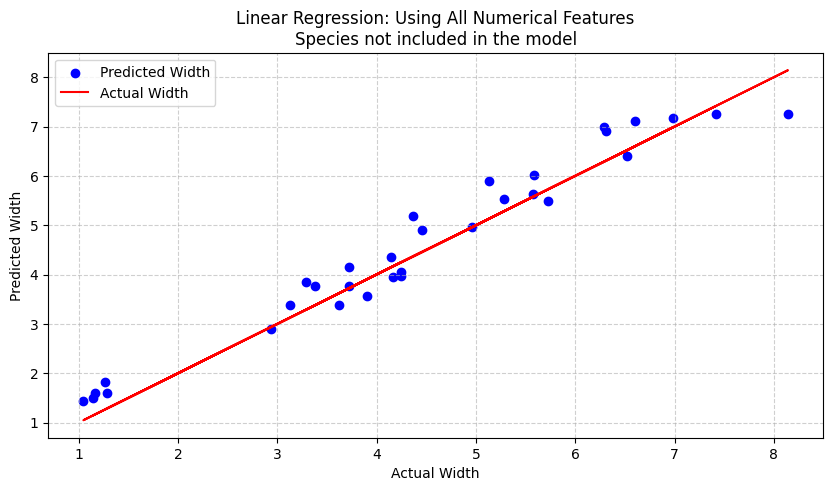

In [21]:
# Plotting the model
from plot_regression import plot_regression
plot_regression(
    y_test, y_pred,
    regression_type='Linear', 
    title="Using All Numerical Features\nSpecies not included in the model")

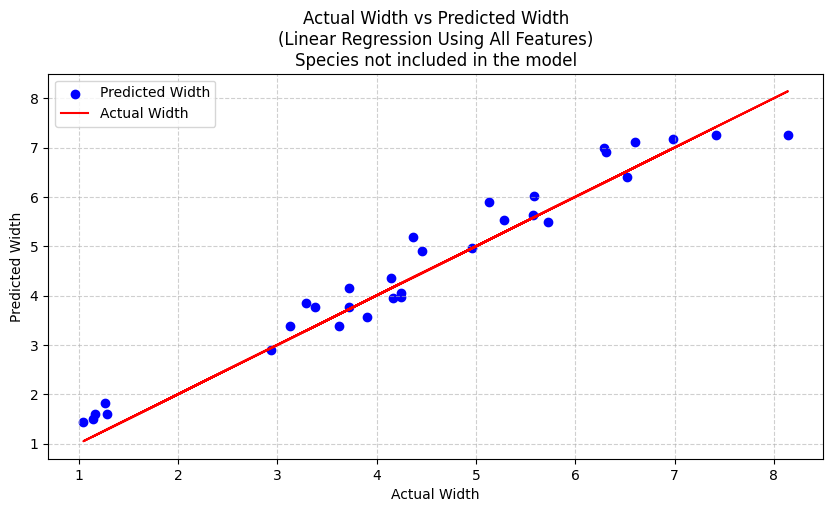

In [22]:
# Plotting the model
fig1_1, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_test, y_pred, color='blue', label='Predicted Width')
ax.plot(y_test, y_test, color='red', label='Actual Width')
ax.set_xlabel('Actual Width')
ax.set_ylabel('Predicted Width')
ax.set_title(
    'Actual Width vs Predicted Width\n(Linear Regression Using All Features)\nSpecies not included in the model')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
plt.show()

#### 1.2. **Using the 'Species' variable**


The species are categorical variables, so encoding them is necessary. The class/method below is encoding the species using the OneHotEncoder from Scikit-learn.

What the OneHotEncoder does is to create a binary column for each category and returns a sparse matrix or dense array.


In [23]:
from sklearn.preprocessing import OneHotEncoder

# Encoding the Species column
encoder = OneHotEncoder()
encoder.handle_unknown = 'ignore'

# Turning the Species column into a numpy array with new columns
# for each species. 1: True, 0: False
species_encoded = encoder.fit_transform(df[['Species']])
species_encoded.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
# All the categories in the Species column
encoder.categories_

[array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object)]

In [25]:
# Combine the encoded species with the original dataset
encoder.get_feature_names_out()

df_output = pd.DataFrame(encoder.transform(df[['Species']]).toarray(),

                         columns=encoder.categories_[0].tolist(),

                         index=df.index)


df = pd.concat([df_output, df.drop(columns=['Species'])], axis=1)

df.head(3).style.background_gradient(cmap='viridis')

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


Combining the encoded species with the other variables, the dataset is ready to be split into training and test sets.


In [26]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Width'])
y = df['Width']

In [27]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [28]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# R2 score of the training set
train_r2_one = lr.score(X_train, y_train)
print(f'Training R²: {train_r2_one:.2f}')

Training R²: 0.96


The training set has a R2 score of 0.96, which is a good indication that the model is fitting the data well.

Later on, we have to check the performance of the model on the test set, that is, how well the model generalizes to new data.


In [30]:
# Where the model intercepts the y-axis
intercept = lr.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr.coef_
print(f'Coefficients: {coef}')

Intercept: -0.6277887708466734
Coefficients: [-1.72792322e+00 -7.45346722e-01  8.89626108e-01  4.28978529e-02
  3.50517699e-01  4.19406473e-01  7.70821811e-01  7.90346816e-05
  1.40719021e-01 -2.33739513e-01  1.55005460e-01  3.52235681e-01]


In [31]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
-0.627789 
+ Bream*-1.727923
+ Parkki*-0.745347
+ Perch*0.889626
+ Pike*0.042898
+ Roach*0.350518
+ Smelt*0.419406
+ Whitefish*0.770822
+ Weight*0.000079
+ Length1*0.140719
+ Length2*-0.233740
+ Length3*0.155005
+ Height*0.352236


As stated before, the 'Weight' variable seems to have a non-linear relationship with the 'Width' variable.

On the equation above, the 'Weight' variable has a low coefficient, which means that it has a low impact on the 'Width' variable, as expected.

The 'Species' variable which was encoded using the OneHotEncoder, has a high coefficient, which means that it has a high impact on the 'Width' variable. That is expected, since the pairplot showed that the species seems to define the distribution of the other variables.


In [32]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([3.09960238, 1.48922577, 3.45813866, 4.80864657, 3.48855886,
       7.06961231, 1.14266171, 3.98849405, 4.1398405 , 6.75980093,
       5.32457662, 7.2155638 , 5.55320117, 3.1576432 , 6.00587081,
       6.83217494, 7.39993754, 4.46792357, 4.28718434, 5.43513883,
       1.43479283, 5.70015439, 4.90461413, 5.14080819, 6.83603091,
       7.40090656, 3.89326903, 4.77236421, 1.09671327, 1.43478493,
       4.60700527, 2.89324918])

In [33]:
# Performance of the model
mse_two = mean_squared_error(y_test, y_pred)
mae_two = mean_absolute_error(y_test, y_pred)
r2_two = r2_score(y_test, y_pred)
rmse_two = np.sqrt(mse_two)

print(f'Mean Squared Error: {mse_two}')
print(f'Root Mean Squared Error: {rmse_two}')
print(f'Mean Absolute Error: {mae_two}')
print(f'R2 Score: {r2_two}')

Mean Squared Error: 0.12914695042492386
Root Mean Squared Error: 0.35937021360280247
Mean Absolute Error: 0.28157913037168464
R2 Score: 0.9631942679386132


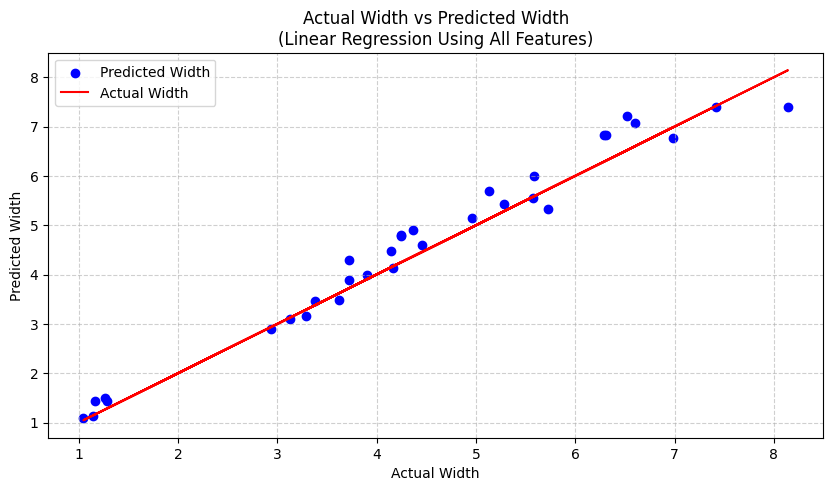

In [34]:
# Plotting the model
fig1, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_test, y_pred, color='blue', label='Predicted Width')
ax.plot(y_test, y_test, color='red', label='Actual Width')
ax.set_xlabel('Actual Width')
ax.set_ylabel('Predicted Width')
ax.set_title(
    'Actual Width vs Predicted Width\n(Linear Regression Using All Features)')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
plt.show()

Evaluation of the model:

- MSE: The lower, the better. It is sensitive to outliers.
- RMSE: The lower, the better. RMSE is sensitive to outliers.
- MAE: The lower, the better. MAE is less sensitive to outliers.
- R2 score: The closer to 1, the better.

Lower MSE, RMSE, or MAE, or higher R2 indicates a better fit to the data. However, RMSE gives a relatively high weight to large errors because it squares the residuals. If the data has many outliers, or if the cost of large errors is particularly high, RMSE may be a better choice.

Since we considered outliers on the exploratory analysis, we will use RMSE as a metric to evaluate the performance of the model. We got a RMSE of 0.35937 on this first model. Is it good or bad? Can we get a better model?

Let's try working a bit more on the data and see if we can.

<hr>


### 2. **Linear Regression 2**


As seen before, the 'Weight' variable seems to have a non-linear relationship with the 'Width' variable.

Is it possible to improve the model if we remove the 'Weight' variable from the analysis? Let's try it.

The next steps are the same as before, but without the 'Weight' variable.


In [35]:
# Dropping the weigth column from the dataset
df2 = df.drop(columns=['Weight'])
df2.head(3).style.background_gradient(cmap='viridis')

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Length1,Length2,Length3,Height,Width
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.900000,26.500000,31.100000,12.377800,4.696100


In [36]:
# Splitting the dataset into features and target variable
X = df2.drop(columns=['Width'])
y = df2['Width']

In [37]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [38]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [39]:
# R2 score of the training set
train_r2_two = lr2.score(X_train, y_train)
print(f'Training R²: {train_r2_two:.2f}')

Training R²: 0.96


In [40]:
# Where the model intercepts the y-axis
intercept = lr2.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr2.coef_
print(f'Coefficients: {coef}')

Intercept: -0.6901861832884579
Coefficients: [-1.73225663 -0.73808206  0.89269345  0.01337126  0.3501394   0.44245079
  0.77168379  0.13612269 -0.22947503  0.15818241  0.3515884 ]


In [41]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
-0.690186 
+ Bream*-1.732257
+ Parkki*-0.738082
+ Perch*0.892693
+ Pike*0.013371
+ Roach*0.350139
+ Smelt*0.442451
+ Whitefish*0.771684
+ Length1*0.136123
+ Length2*-0.229475
+ Length3*0.158182
+ Height*0.351588


In [42]:
# Testing the model
y_pred = lr2.predict(X_test)
y_pred

array([3.09490237, 1.48923192, 3.45721404, 4.81392864, 3.49339094,
       7.05072278, 1.13726969, 3.99453327, 4.14555854, 6.75163168,
       5.32042618, 7.20433026, 5.54857036, 3.15677976, 6.00460361,
       6.82447138, 7.40028621, 4.47377908, 4.28759114, 5.4261412 ,
       1.43321665, 5.69855694, 4.90567853, 5.14028089, 6.82521296,
       7.39014991, 3.89725911, 4.77953863, 1.08906216, 1.43321665,
       4.61229393, 2.88622996])

In [43]:
# Performance of the model
mse_two = mean_squared_error(y_test, y_pred)
mae_two = mean_absolute_error(y_test, y_pred)
r2_two = r2_score(y_test, y_pred)
rmse_two = np.sqrt(mse_two)

print(f'Mean Squared Error: {mse_two}')
print(f'Root Mean Squared Error: {rmse_two}')
print(f'Mean Absolute Error: {mae_two}')
print(f'R2 Score: {r2_two}')

Mean Squared Error: 0.12820314641785757
Root Mean Squared Error: 0.35805466959370547
Mean Absolute Error: 0.28148963076188965
R2 Score: 0.9634632436851426


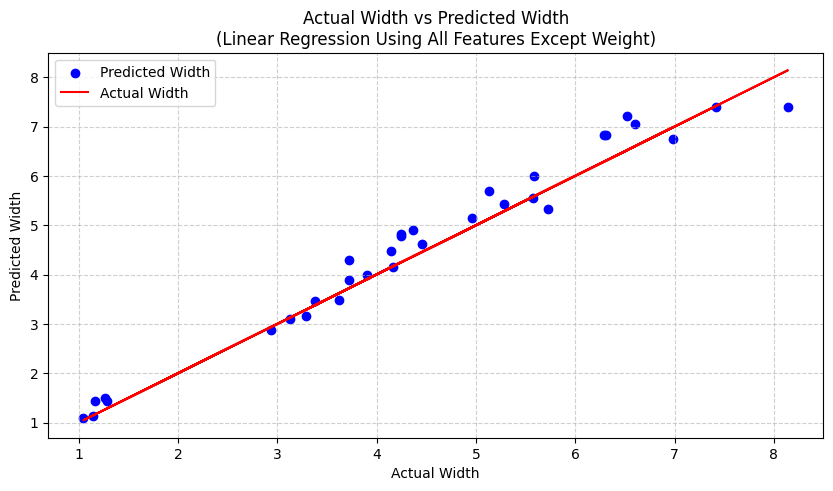

In [44]:
# Plotting the model
fig2, bx = plt.subplots(figsize=(10, 5))
bx.scatter(y_test, y_pred, color='blue', label='Predicted Width')
bx.plot(y_test, y_test, color='red', label='Actual Width')
bx.set_xlabel('Actual Width')
bx.set_ylabel('Predicted Width')
bx.set_title(
    'Actual Width vs Predicted Width\n(Linear Regression Using All Features Except Weight)')
bx.grid(True, linestyle='--', alpha=0.6)
bx.legend()
plt.show()

The difference between the metrics of the two models is not significant, so it seems that removing the 'Weight' variable from the analysis didn't improve the model that much. See that the plots are very similar.


### 3. **Polynomial Regression**


On this model, we will use just one feature to predict the target variable. The feature used is the 'Weight' variable, which seems to have a non-linear relationship with the 'Width' variable.


In [45]:
# Splitting the dataset into feature and target variable
X = df['Weight']
y = df['Width']

In [46]:
# PolynomialFeatures (preprocessing)
from sklearn.preprocessing import PolynomialFeatures

# Transforming the feature to the desired degree
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X.values.reshape(-1, 1))

In [47]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [48]:
# Linear model to fit the polynomial features
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [49]:
# Training R2 score
train_r2_three = lr3.score(X_train, y_train)
print(f'Training R²: {train_r2_three:.2f}')

Training R²: 0.90


In [50]:
# Predicting the model
y_pred = lr3.predict(X_test)
y_pred

array([2.79677666, 2.28268616, 3.68887447, 4.15422108, 3.3357194 ,
       6.98603016, 2.23018202, 3.54968891, 3.60569537, 7.10793846,
       6.08859626, 6.98603016, 5.89117596, 3.3357194 , 6.2687127 ,
       6.85565511, 6.98603016, 3.81177431, 3.85896306, 6.2687127 ,
       2.25482863, 5.93204433, 5.44442377, 5.44442377, 6.91814491,
       7.08670507, 3.47905789, 4.15422108, 2.22771393, 2.25400808,
       5.49221369, 2.73467924])

In [51]:
# Evaluating the model
mse_three = mean_squared_error(y_test, y_pred)
mae_three = mean_absolute_error(y_test, y_pred)
r2_three = r2_score(y_test, y_pred)
rmse_three = np.sqrt(mse_three)

print(f'Mean Squared Error: {mse_three}')
print(f'Root Mean Squared Error: {rmse_three}')
print(f'Mean Absolute Error: {mae_three}')
print(f'R2 Score: {r2_three}')

Mean Squared Error: 0.4364591238548738
Root Mean Squared Error: 0.6606505308064724
Mean Absolute Error: 0.5527908927412059
R2 Score: 0.8756130321661089


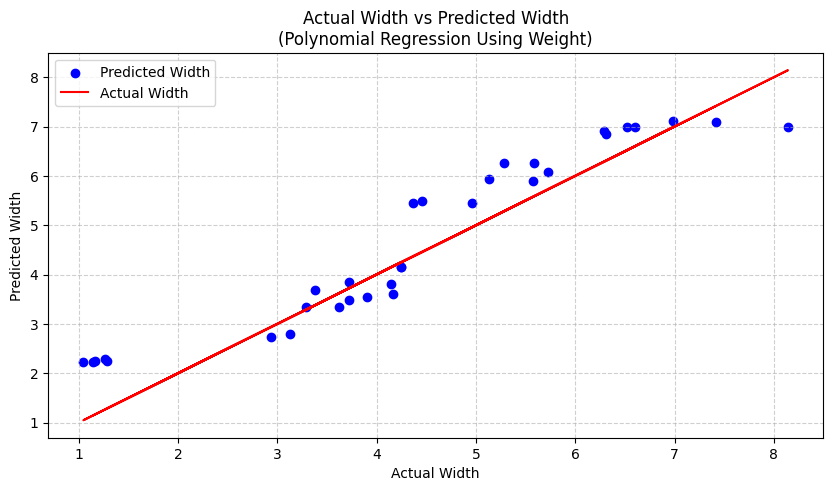

In [52]:
# Plotting the model
fig3, cx = plt.subplots(figsize=(10, 5))
cx.scatter(y_test, y_pred, color='blue', label='Predicted Width')
cx.plot(y_test, y_test, color='red', label='Actual Width')
cx.set_xlabel('Actual Width')
cx.set_ylabel('Predicted Width')
cx.set_title(
    'Actual Width vs Predicted Width\n(Polynomial Regression Using Weight)')
cx.grid(True, linestyle='--', alpha=0.6)
cx.legend()
plt.show()

### 4. **Linear and Polynomial Regression**
